1. Plik kawa.txt zawiera dane dotyczace 2 rodzajów ziaren kawy. Spróbujemy znaleźć nowe główne składowe, najlepiej opisujące dane, zmniejszając liczbę wymiarów.
2. Zmienna 'Kawa' zawiera etykiety obiektów i zostanie pominięta w obiczeniach. Reszta zmiennych to stężenia pierwiastków które są zmiennymi objaśniającymi.

  Kawa     Zn      P    Mn    Fe     Mg    Cu     Ca    Sr    Ba    Na      K
0    A  2.899  0.139  2.68  5.98  0.173  1.78  0.089  4.13  2.92  2.30  1.466
1    R  1.393  0.158  1.22  5.61  0.161  1.68  0.094  4.14  9.10  2.14  1.448
2    A  1.933  0.134  1.41  4.62  0.174  1.34  0.097  5.59  5.31  3.34  1.493
3    R  2.997  0.173  1.98  7.34  0.165  1.31  0.087  4.40  5.01  3.38  1.541
4    A  5.440  0.140  2.93  4.66  0.173  1.12  0.090  5.75  9.17  3.01  1.422

Explained variance / %: 
 34.21
 19.85
 12.77
 10.86
 7.63
 4.20
 4.11
 2.89
 1.95
 0.97
 0.54


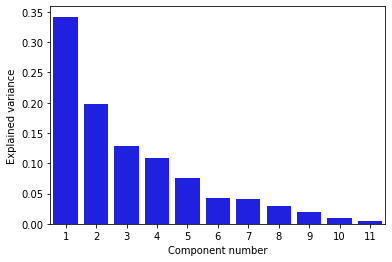

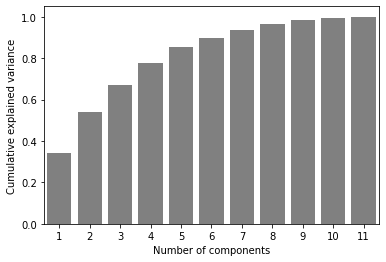

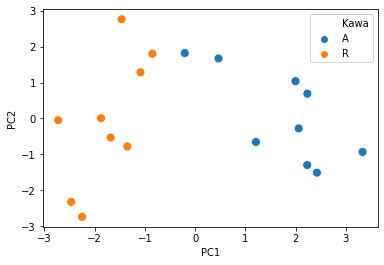

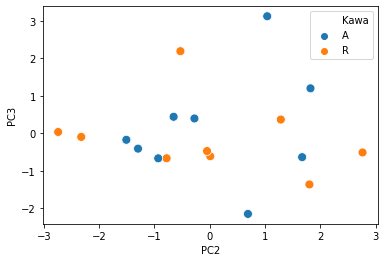

Explained variance of 5 PC:  85.33 
Loadings: 
[[ 0.126411   -0.46223595  0.36786366 -0.39046283  0.31011252 -0.39078485
  -0.28085415 -0.20127286  0.13620455 -0.03815754 -0.307072  ]
 [-0.37717272 -0.1582227   0.00122065  0.11762573 -0.1820231   0.01321848
  -0.46666368 -0.46010171  0.03351718  0.41692961  0.42560498]
 [-0.21287426 -0.10632348  0.18317724  0.17581507  0.32107263  0.20272422
   0.27524493 -0.37957612 -0.69571423 -0.02694414 -0.1736324 ]
 [ 0.5849875  -0.04351562 -0.23750892 -0.28861894  0.01093433  0.10937217
   0.02758324  0.01072123 -0.29514017  0.64483975  0.01734965]
 [ 0.22980961  0.14098022  0.43573211  0.42516255  0.56961809  0.10802115
  -0.04661325  0.18435945  0.22348053  0.2171036   0.2954901 ]]


In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

coffee =pd.read_csv("kawa.txt",delim_whitespace=True,header=0)
print(coffee.head())
X = coffee.drop('Kawa', 1) 
y = coffee['Kawa'] 

#Autoskalowanie
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

pca = PCA(n_components = 11) # ilosc skladowych
pca.fit(X)  
x_pca = pca.transform(X)

print('\nExplained variance / %: ') 
for i in range(11): 
  print('% 4.2f' % (100*pca.explained_variance_ratio_)[i]) 
splot = sns.barplot(np.arange(1,12),pca.explained_variance_ratio_, color='blue') 
plt.xlabel('Component number') 
plt.ylabel('Explained variance') 
plt.show() 

plt.figure()
sns.barplot(np.arange(1,12),np.cumsum(pca.explained_variance_ratio_), color='grey') 
plt.xlabel('Number of components') 
plt.ylabel('Cumulative explained variance') 
plt.show() 

plt.figure()
sns.scatterplot(x_pca[:,0],x_pca[:,1], hue=y,legend='full', s=80)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

plt.figure()
sns.scatterplot(x_pca[:,1],x_pca[:,2], hue=y,legend='full', s=80)
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.show()

explained_var=0
for i in range(5): 
   explained_var+=(100*pca.explained_variance_ratio_)[i] 


print('Explained variance of 5 PC: % 4.2f ' % explained_var) 
print('Loadings: ') 
print(pca.components_[0:5,:] )


5. Za istotne uznano 5 składowych głównych. Zastosowano metodę procentu wariancji tłumaczonej przez główne składowe.
6. Wybrane składowe wyjaśniają 85,33 % wariancji. Na podstawie wag składowych można stwierdzić że każda oryginalna zmienna wnosi coś do głównych składowych. Redukcja z 11 do 5 zmiennych może znacznie przyśpieszyć obliczenia i analizę danych przy niedużej utracie danych.

**Stanisław Kaczmarski**